In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json
import sys
from io import StringIO

In [3]:
data_dir = "./latexData/metrics"

# List all files in the directory
files = os.listdir(data_dir)

print("Files in directory:", files)

Files in directory: ['metrics_0006_broadcast_2025-04-06T13-53-26.json', 'metrics_0006_real_2025-04-06T13-58-08.json', 'metrics_0006_SelfdrivingCar_2025-04-06T14-07-04.json', 'metrics_0008_ROSE_2025-04-06T14-09-07.json', 'metrics_0012_broadcast_2025-04-06T14-37-00.json', 'metrics_0013_Motor_2025-04-06T14-12-59.json', 'metrics_0021_ROSE_2025-04-06T14-15-20.json', 'metrics_0026_ROSE_2025-04-06T14-17-50.json', 'metrics_0061_Singulate_2025-04-06T14-34-19.json', 'metrics_S_0050_Sparce_2025-04-06T14-40-10.json', 'metrics_S_0100_Dense_2025-04-06T15-03-27.json', 'metrics_S_0100_sparse_2025-04-06T14-49-57.json', 'metrics_S_0150_Dense_2025-04-06T17-53-47.json', 'metrics_S_0150_Sparce_2025-04-06T16-06-03.json', 'old']


In [4]:
def get_df(filename: str) -> pd.DataFrame:
    
    # Read the json file to a dictionary
    # Inside the json file, there is a csvSummary key, which contains the csv file
    # Furthermore we need the data set information, e.g.:
    # "dataset": {
    #     "title": "MotorControlSystem",
    #     "description": "Metrics results for multiple visualizations",
    #     "timestamp": "2025-04-03T23-31-24",
    #     "nodeCount": 13,
    #     "connectionCount": 15,
    #     "visualizationCount": 13
    # },
    
    data = {}
        
    with open(os.path.join(data_dir, filename), 'r') as f:
        data = f.read()
        # Parse the json data
        data = json.loads(data)
    
    csv_summary = data.get("csvSummary")
    if csv_summary is None:
        raise ValueError(f"csvSummary not found in {filename}")
    
    # Pass csv_summary as buffer to pandas read_csv
    csv_buffer = StringIO(csv_summary)
    df = pd.read_csv(csv_buffer, sep=",")
    
    df["title"] = data["dataset"]["title"]
    df["nodes"] = data["dataset"]["nodeCount"]
    df["connections"] = data["dataset"]["connectionCount"]
    
    return df

In [6]:
concatenated_df: pd.DataFrame = None # type: ignore

for file in files:
    
    # Skip the file if it is a directory
    if os.path.isdir(file):
        continue
    
    # Check if the file is a json file
    if not file.endswith(".json"):
        continue
    
    df = get_df(file)
    if concatenated_df is None:
        concatenated_df = df
    else:
        concatenated_df = pd.concat([concatenated_df, df], ignore_index=True)

concatenated_df

,Metric,viscom_Default,viscom_CommWoRot,viscom_CommWRot,viscom_Virtual,viscom_DefaultCloser,viscom_CommWoRotCloser,viscom_CommWRotCloser,viscom_VirtualCloser,viscom_DefaultFarther,...,spaceFilling_Setting_45,spaceFilling_Setting_46,spaceFilling_Setting_47,spaceFilling_Setting_48,spaceFilling_Setting_49,title,nodes,connections,graphviz_Setting_29,spaceFilling_Setting_35
0,aspectRatio,0.9426,0.8246,0.8029,0.4697,0.9306,0.8480,0.8297,0.4695,0.9602,...,0.7431,0.8354,0.7044,0.5221,0.4624,0006_real,6,101,NaN,NaN
1,edgeCrossings,0.2222,0.0667,0.0444,0.0680,0.2222,0.0889,0.0444,0.0680,0.2222,...,0.1333,0.1333,0.2222,0.2222,0.2222,0006_real,6,101,NaN,NaN
2,pathEfficiencyRatio,0.9112,0.7911,0.8065,0.9231,0.8637,0.7367,0.7513,0.8843,0.9430,...,0.9976,0.9991,0.9956,0.9981,0.9991,0006_real,6,101,NaN,NaN
3,pathEfficiencyRatioNormalized,0.9946,0.9250,0.9451,0.9916,0.9982,0.9204,0.9458,0.9955,0.9917,...,1.0000,1.0000,1.0000,1.0000,1.0000,0006_real,6,101,NaN,NaN
4,stress,0.6841,0.6058,0.6076,0.1666,0.6841,0.6083,0.6114,0.1589,0.6841,...,0.6542,0.6612,0.6628,0.6353,0.6354,0006_real,6,101,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,pathContinuity,0.5002,0.5041,0.4737,0.3898,0.5002,0.5004,0.4734,0.3898,0.5002,...,0.6223,0.4938,0.4972,0.5249,NaN,S_0150_Sparce,150,249,0.4325,0.5028
136,weightedPathContinuity,0.4301,0.4740,0.4516,0.3620,0.4301,0.4705,0.4518,0.3620,0.4301,...,0.5949,0.4455,0.4656,0.5063,NaN,S_0150_Sparce,150,249,0.4128,0.4325
137,pathAngularPrediction,0.4373,0.4627,0.4779,0.1989,0.4373,0.4569,0.4773,0.1989,0.4373,...,0.6117,0.4644,0.5197,0.5449,NaN,S_0150_Sparce,150,249,0.5157,0.5146
138,nodeEdgeOverlaps,1.0000,0.9999,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,...,0.9992,0.9890,0.9982,0.9993,NaN,S_0150_Sparce,150,249,1.0000,0.9893


In [ ]:
len(concatenated_df)

In [5]:
concatenated_df["Metric"].unique()

array(['aspectRatio', 'edgeCrossings', 'pathEfficiencyRatio',
       'pathEfficiencyRatioNormalized', 'stress', 'pathContinuity',
       'weightedPathContinuity', 'pathAngularPrediction',
       'nodeEdgeOverlaps'], dtype=object)

In [6]:
concatenated_df.columns

Index(['Metric', 'fdg_FDG', 'radial_RadialDefault',
       'radial_RadialWithBackward', 'viscom_Communities', 'viscom_Virtual',
       'viscom_Default', 'viscom_CommunitiesWoRotation', 'arc_ArcDefault',
       'spaceFilling_Hilbert2', 'spaceFilling_Hilbert3', 'spaceFilling_Peano2',
       'graphviz_GraphvizDot', 'graphviz_GraphvizCirco', 'title', 'nodes',
       'connections'],
      dtype='object')

In [13]:
# 'fdg_FDG', 'radial_RadialDefault',
#    'radial_RadialWithBackward', 'viscom_Communities', 'viscom_Virtual',
#    'viscom_Default', 'viscom_CommunitiesWoRotation', 'arc_ArcDefault',
#    'spaceFilling_Hilbert2', 'spaceFilling_Hilbert3', 'spaceFilling_Peano2',
#    'graphviz_GraphvizDot', 'graphviz_GraphvizCirco', 'title', 'nodes',
#    'connections'
col_renames = {
    "viscom_Default": "*(no comm.)",
    "viscom_CommunitiesWoRotation": "*(no rot.)",
    "viscom_Communities": "*(with rot.)",
    "viscom_Virtual": "*(virtual)",
    "fdg_FDG": "FDG",
    "graphviz_GraphvizDot": "DOT",
    "graphviz_GraphvizCirco": "CIRCO",    
    "radial_RadialDefault": "RAD",
    "radial_RadialWithBackward": "RADB",
    "arc_ArcDefault": "ARC",
    "spaceFilling_Hilbert2": "Hil2",
    "spaceFilling_Hilbert3": "Hil3",
    "spaceFilling_Peano2": "Pea2",
}

# Rename the columns
renamed_df = concatenated_df.copy().rename(columns=col_renames)

# Bring the columns in the order of the col_renames dict
ordered_columns = list(col_renames.values()) + ["title", "nodes", "connections", "Metric"]
renamed_df = renamed_df[ordered_columns]
renamed_df

,*(no comm.),*(no rot.),*(with rot.),*(virtual),FDG,DOT,CIRCO,RAD,RADB,ARC,Hil2,Hil3,Pea2,title,nodes,connections,Metric
0,0.9916,0.7931,0.7774,0.9739,0.8093,0.9674,1.0000,0.9916,0.9916,0.0000,1.0000,1.0000,1.0000,Broadcast12,12,182,aspectRatio
1,0.1708,0.2733,0.1584,0.0239,0.0280,0.0590,0.1273,0.3416,0.0932,0.2970,0.1708,0.2112,0.1957,Broadcast12,12,182,edgeCrossings
2,1.0000,0.6877,0.6632,1.0000,1.0000,0.9097,1.0000,0.8758,0.8061,0.5982,1.0000,1.0000,1.0000,Broadcast12,12,182,pathEfficiencyRatio
3,0.9912,0.8162,0.7869,0.9981,1.0000,0.9133,0.9597,0.8810,0.9030,0.5606,1.0000,1.0000,1.0000,Broadcast12,12,182,pathEfficiencyRatioNormalized
4,0.3672,0.3908,0.3702,0.1472,0.3265,0.4102,0.3583,0.3672,0.3672,0.5098,0.3702,0.3750,0.3711,Broadcast12,12,182,stress
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,0.2047,0.2107,0.2135,0.2028,0.1678,0.2214,0.3509,0.2147,0.2147,0.3243,0.2147,0.2205,0.2201,S_50_Sparse,50,66,stress
113,0.3613,0.5708,0.4397,0.4279,0.3590,0.5428,0.5232,0.3597,0.3597,0.4467,0.4187,0.4873,0.5260,S_50_Sparse,50,66,pathContinuity
114,0.3477,0.5591,0.4301,0.4123,0.3591,0.5267,0.5209,0.3432,0.3432,0.4034,0.3987,0.4774,0.5135,S_50_Sparse,50,66,weightedPathContinuity
115,0.3053,0.5425,0.4314,0.1761,0.3779,0.4706,0.5639,0.3064,0.3064,0.4336,0.4370,0.5036,0.6365,S_50_Sparse,50,66,pathAngularPrediction


In [18]:
renamed_df["Metric"].unique()

array(['aspectRatio', 'edgeCrossings', 'pathEfficiencyRatio',
       'pathEfficiencyRatioNormalized', 'stress', 'pathContinuity',
       'weightedPathContinuity', 'pathAngularPrediction',
       'nodeEdgeOverlaps'], dtype=object)

In [19]:
# 'aspectRatio', 'edgeCrossings', 'pathEfficiencyRatio',
    #    'pathEfficiencyRatioNormalized', 'stress', 'pathContinuity',
    #    'weightedPathContinuity', 'pathAngularPrediction',
    #    'nodeEdgeOverlaps'
metric_renames = {
    "aspectRatio": "Aspect Rat.",
    "edgeCrossings": "Edge Cross.",
    "pathEfficiencyRatio": "Path Efficiency",
    "pathEfficiencyRatioNormalized": "Path Efficiency (norm.)",
    "stress": "Stress",
    "pathContinuity": "Path Continuity",
    "weightedPathContinuity": "W. Path Continuity",
    "pathAngularPrediction": "Path Prediction",
    "nodeEdgeOverlaps": "Node Edge Overlaps",
}
    

Layout techniques: ['*(no comm.)', '*(no rot.)', '*(with rot.)', '*(virtual)', 'FDG', 'DOT', 'CIRCO', 'RAD', 'RADB', 'ARC', 'Hil2', 'Hil3', 'Pea2']
Found 9 metrics: ['aspectRatio' 'edgeCrossings' 'pathEfficiencyRatio'
 'pathEfficiencyRatioNormalized' 'stress' 'pathContinuity'
 'weightedPathContinuity' 'pathAngularPrediction' 'nodeEdgeOverlaps']


C:\Users\schoc\AppData\Local\Temp\ipykernel_40416\241944000.py:30: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(boxplot_data, labels=layout_techniques, widths=0.6)
C:\Users\schoc\AppData\Local\Temp\ipykernel_40416\241944000.py:30: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(boxplot_data, labels=layout_techniques, widths=0.6)
C:\Users\schoc\AppData\Local\Temp\ipykernel_40416\241944000.py:30: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(boxplot_data, labels=layout_techniques, widths=0.6)
C:\Users\schoc\AppData\Local\Temp\ipykernel_40416\241944000.py:30: MatplotlibDeprecationWarning: 

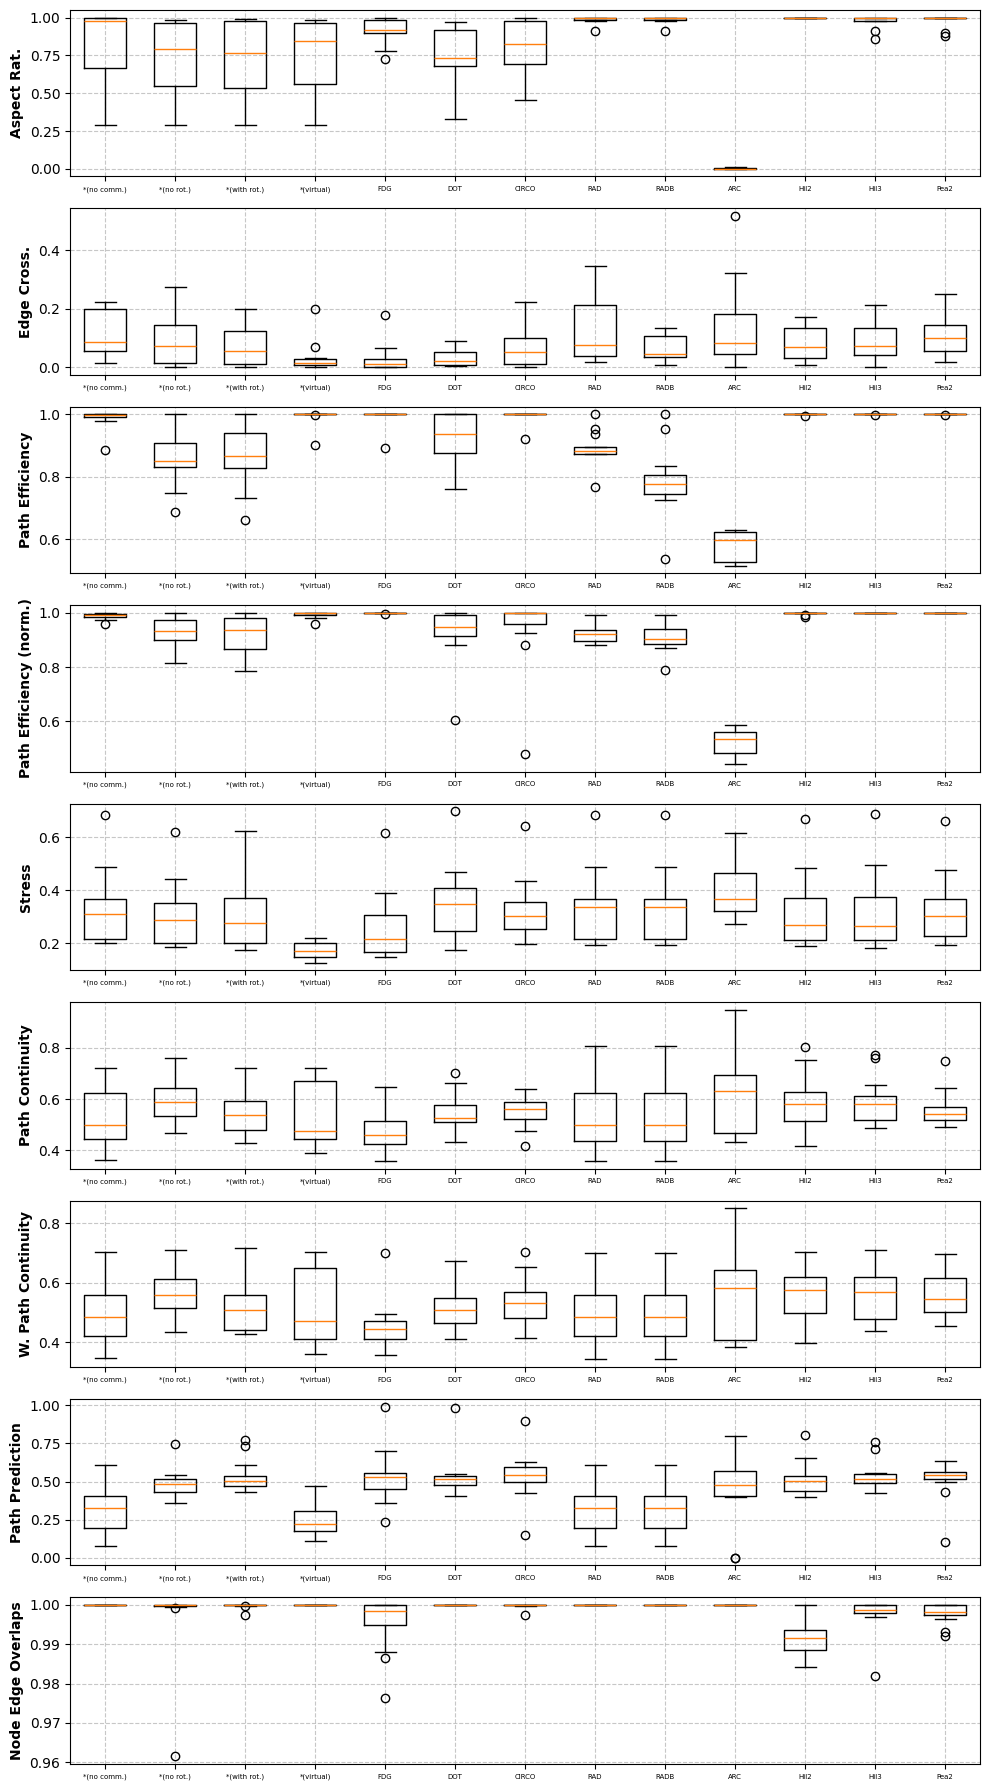

In [20]:
# Fix the column selection - get layout technique columns
plot_df = renamed_df
excluded_cols = ["title", "nodes", "connections", "Metric", "Value"]
layout_techniques = [col for col in plot_df.columns if col not in excluded_cols]
print("Layout techniques:", layout_techniques)

# Get unique metrics
metrics = plot_df["Metric"].unique()
print(f"Found {len(metrics)} metrics: {metrics}")

# Create a figure with subplots - one row per metric
# Make each subplot shorter by reducing the height
fig, axes = plt.subplots(len(metrics), 1, figsize=(10, 2.0*len(metrics)), squeeze=False)

# Plot each metric in its own row
for i, metric in enumerate(metrics):
    ax = axes[i, 0]
    
    # Filter data for this metric
    metric_data = plot_df[plot_df["Metric"] == metric]
    
    # Prepare data for boxplot
    boxplot_data = []
    for technique in layout_techniques:
        # Get values for this technique, excluding NaNs
        values = metric_data[technique].dropna().values
        boxplot_data.append(values)
    
    # Create boxplot with reduced width
    ax.boxplot(boxplot_data, labels=layout_techniques, widths=0.6)
    
    # Move metric title to left as y-axis label
    renamed_metric = metric_renames.get(metric, metric)
    ax.set_ylabel(f'{renamed_metric}', fontsize=10, fontweight='bold')
    ax.set_title('')  # Remove title from above plot
    ax.grid(True, linestyle='--', alpha=0.7)
    
    # Make x-tick labels horizontal and smaller
    plt.setp(ax.get_xticklabels(), rotation=0, ha='center', fontsize=5)

# Adjust layout
fig.subplots_adjust(hspace=0.4, top=0.95)
plt.tight_layout()
plt.show()


In [21]:
from IPython.display import FileLink

# Save the figure as a PDF file
output_filename = "metrics_boxplot.pdf"
fig.savefig(output_filename, format="pdf", bbox_inches="tight")
print(f"Plot saved as {output_filename}")

# For direct download in Jupyter notebook
display(FileLink(output_filename))

Plot saved as metrics_boxplot.pdf


c:\Users\schoc\Documents\Studium\HPI\Master Thesis\docs\latex-helper\metrics_boxplot.pdf